In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from skimage import color
import PIL
import cv2
import pathlib

In [2]:
data_dir = "images/"
images_path = pathlib.Path(data_dir)

In [3]:
xray_image_path = list(images_path.glob('covid*'))

In [4]:
xrays = []
for i in range(len(xray_image_path)):
    xrays.append(cv2.imread(str(xray_image_path[i])))

In [5]:
xrays[0]

array([[[  0,   4,   0],
        [  2,   3,   1],
        [  5,   0,   3],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   3,   0],
        [  0,   1,   0],
        [ 11,   4,   9],
        ...,
        [  0,   0,   0],
        [  6,   6,   6],
        [  1,   1,   1]],

       [[  0,   5,   0],
        [  7,  11,   6],
        [136, 131, 133],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [  2,   0,   0],
        [  0,   0,   1],
        [  0,   3,   3]],

       [[  2,   2,   2],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   0,   4],
        [  0,   0,   3],
        [  0,   0,   3]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  6,   6,   6],
        ...,
        [  4,   0,   6],
        [  0,   0,   4],
        [  0,   0,   4]]

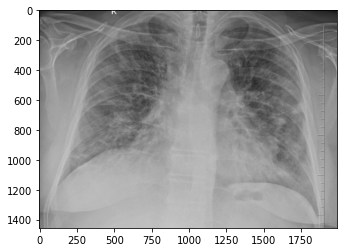

In [6]:
plt.imshow(xrays[5], cmap='gray')
plt.show()

In [7]:
XRAYgray=list()
for i in range(10):
    imgGray = color.rgb2gray(xrays[i])
    XRAYgray.append(imgGray)

In [8]:
 U , D, Vt= np.linalg.svd(XRAYgray[5])
reconimg=np.matrix(U[:,:5])*np.diag(D[:5])*np.matrix(Vt[:5,:])

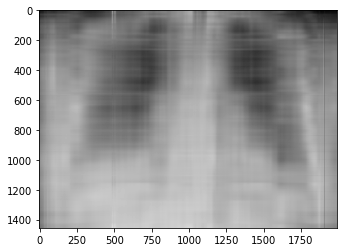

In [9]:
plt.imshow(reconimg, cmap='gray')

In [10]:
svd_train=list()
for i in range(10):
    U , D, Vt = np.linalg.svd(XRAYgray[i])
    reconimg = np.matrix(U[:,:5])*np.diag(D[:5])*np.matrix(Vt[:5,:])
    svd_train.append(reconimg)

In [11]:
svd_train=np.array(svd_train)

In [12]:
len(svd_train)

10

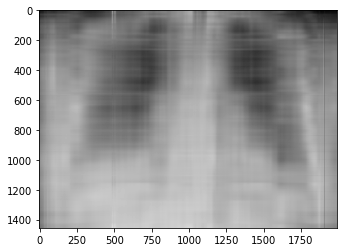

In [13]:
plt.imshow(svd_train[5],cmap='gray')

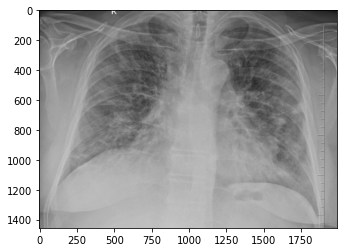

In [14]:
plt.imshow(xrays[5])